In [1]:
import numpy as np
import cv2

def fill_point_cloud_section(image):
    # 1. 找到所有白色像素点的坐标
    white_pixels = np.where(image > 0)
    points = list(zip(white_pixels[1], white_pixels[0]))  # (x,y)坐标
    if not points:
        return image
    points.sort()  # 按x坐标排序
    
    # 2. 创建新图像
    height, width = image.shape
    filled_image = np.zeros_like(image)
    
    # 3. 使用插值连接点
    x_coords = np.array([p[0] for p in points])
    y_coords = np.array([p[1] for p in points])
    
    # 对所有x坐标进行遍历
    for x in range(width):
        try:
            # 找到对应的y值
            if x < min(x_coords) or x > max(x_coords):
                continue
                
            # 找到x左右两边最近的点
            mask = (x_coords <= x)
            if not any(mask) or all(mask):
                continue
                
            left_idx = np.where(mask)[0][-1]
            right_idx = np.where(~mask)[0][0]
            
            # 线性插值计算y值
            if left_idx == right_idx:
                y = y_coords[left_idx]
            else:
                x1, y1 = x_coords[left_idx], y_coords[left_idx]
                x2, y2 = x_coords[right_idx], y_coords[right_idx]
                # 检查除数是否为0
                if x2 - x1 == 0:
                    y = y1
                else:
                    y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
            
            # 确保y值有效
            if np.isnan(y):
                continue
                
            y = int(np.clip(round(y), 0, height-1))
            # filled_image[0:y, x] = 255  # 上方填充白色
            filled_image[y, x] = 255  # 上方填充白色
            
        except Exception as e:
            print(f"Error at x={x}: {str(e)}")
            continue
    
    return filled_image



def process_point_cloud_image(image):
    """处理点云图像的主函数"""
    # 1. 预处理：确保图像是二值图像
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # 2. 基本填充
    try:
        filled = fill_point_cloud_section(binary_image)
    except Exception as e:
        print(f"Fill error: {str(e)}")
        return binary_image
    
    # 3. 平滑处理
    try:
        smoothed = smooth_boundary(filled)
    except Exception as e:
        print(f"Smooth error: {str(e)}")
        return filled
    
    return smoothed


# 使用示例
def main():
    image_path = "./images/first/projected_image_8.png"  # 输入图像路径
    output_path = "./images/first/processed_image.png"  # 输出图像路径
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    result = process_point_cloud_image(image)

    cv2.imwrite(output_path, result)
    
    return result
    





# main()

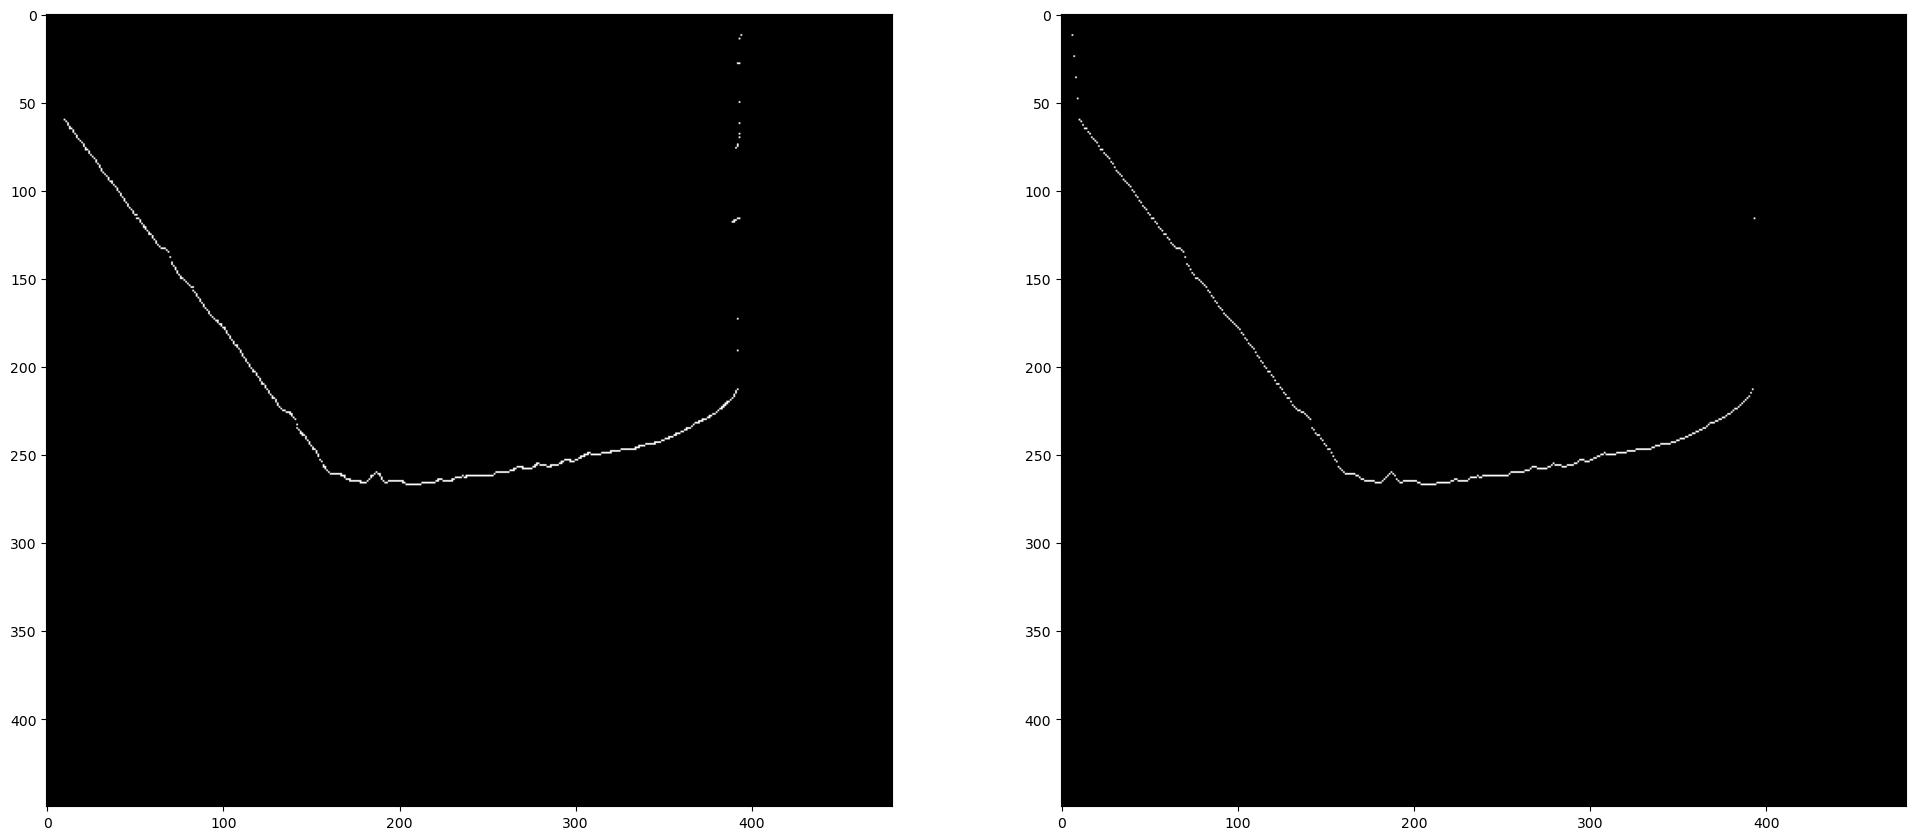

In [17]:
import matplotlib.pyplot as plt
import cv2
image_path = "./images/bead3/projected_image_8.png"  # 输入图像路径
output_path = "./images/bead3/processed_image.png"  # 输出图
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image[0, 5] = 255

plt.figure(figsize=(24, 24))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

image = fill_point_cloud_section(image)
# image = process_point_cloud_image(image)
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')

In [3]:
import numpy as np
import cv2
image = cv2.imread('./images/bead3/projected_image.png', cv2.IMREAD_GRAYSCALE)
print(image.any())
# points = np.where(image == 255)
# points = np.column_stack((points[1], points[0]))
# points = points[points[:, 0].argsort()]
# print(points[-1])
# # width = image.shape[1]
# dx = 480 - points[-1][0]
# print(dx)
# image = image[:, 0 : 480 - 38]
# pading = np.zeros((image.shape[0], 38))
# image = np.hstack((pading, image))
# cv2.imwrite('./images/bead3/fixed_projected_image_8.png', image)
# # plt.figure(figsize=(24, 24))
# # plt.imshow(image, cmap='gray')

# image[0, 5] = 255

# plt.figure(figsize=(12, 12))
# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')

# image = fill_point_cloud_section(image)
# # image = process_point_cloud_image(image)
# plt.subplot(1, 2, 2)
# plt.imshow(image, cmap='gray')


True


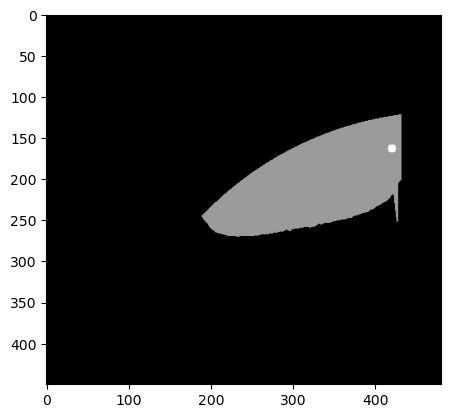

In [4]:
import cv2
import matplotlib.pyplot as plt
image1 = cv2.imread('./images/draw_image.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./images/bead3/processed_image.png', cv2.IMREAD_GRAYSCALE)
image = image2 - image1
plt.imshow(image, cmap='gray')

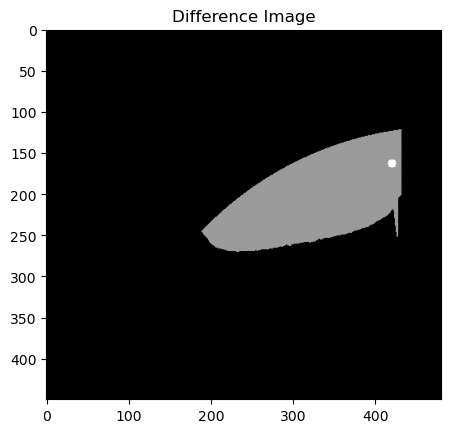

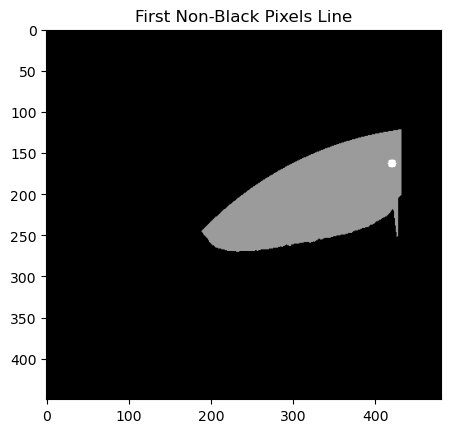

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
image1 = cv2.imread('./images/draw_image.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./images/bead3/processed_image.png', cv2.IMREAD_GRAYSCALE)

# 计算差值图像
image = image2 - image1

# 显示差值图像
plt.imshow(image, cmap='gray')
plt.title('Difference Image')
plt.show()

# 找到每列第一个非黑色像素的y坐标
first_non_black_pixels = []
threshold = 100  # 设定一个阈值，灰度值大于该值的像素被认为是非黑色

for col in range(image.shape[1]):
    column = image[:, col]
    non_black_indices = np.where(column > threshold)[0]
    # print('non_black_indices', non_black_indices)
    if len(non_black_indices) > 0:
        first_non_black_pixels.append((column, non_black_indices[0]))
    else:
        first_non_black_pixels.append(image.shape[0] - 1)  # 如果没有非黑色像素，取最底部的像素



# 计算平整度（方差）
# variance = np.var(first_non_black_pixels)
# std_dev = np.std(first_non_black_pixels)

# print(f"Variance of the line: {variance}")
# print(f"Standard Deviation of the line: {std_dev}")

# 可视化第一个非黑色像素的线条
plt.plot(first_non_black_pixels[0], first_non_black_pixels[1], 'r-')
plt.imshow(image, cmap='gray')
plt.title('First Non-Black Pixels Line')
plt.show()

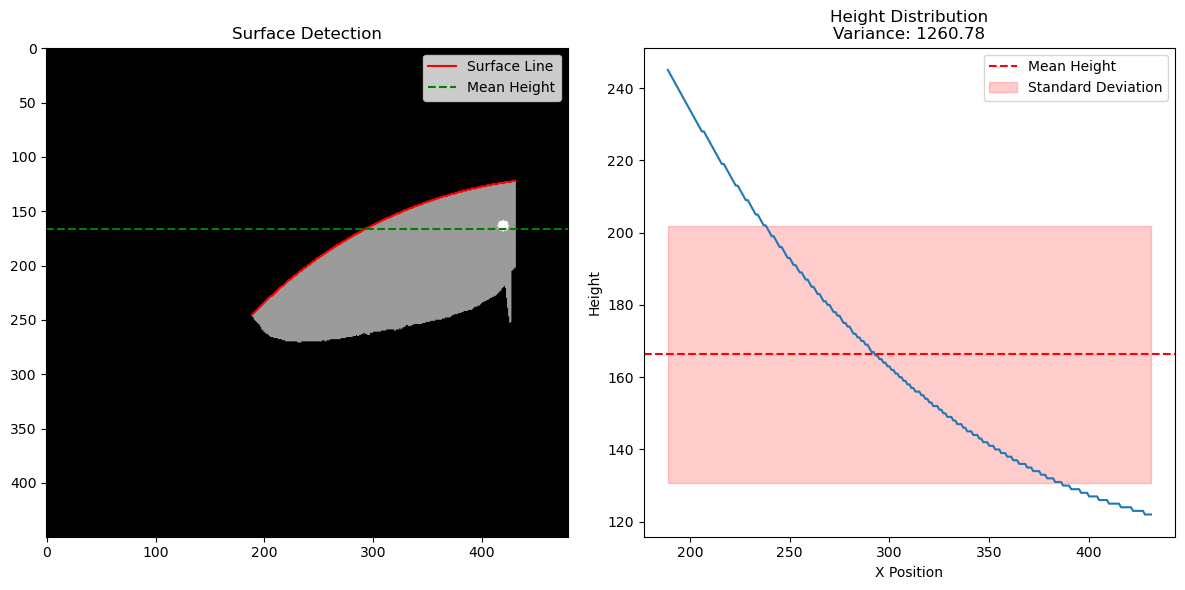

平均高度: 166.28
高度方差: 1260.78
高度标准差: 35.51

平整度得分 (0-100): 0.00


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_surface_smoothness(image):
    # 获取图像尺寸
    height, width = image.shape
    
    # 存储每列第一个非黑色像素的y坐标
    surface_heights = []
    x_positions = []
    
    # 对每列进行遍历
    for x in range(width):
        # 获取当前列
        column = image[:, x]
        # 找到第一个非黑色像素的索引
        non_black_indices = np.where(column > 0)[0]
        if len(non_black_indices) > 0:
            surface_heights.append(non_black_indices[0])
            x_positions.append(x)
    
    # 计算高度的统计特征
    heights_array = np.array(surface_heights)
    mean_height = np.mean(heights_array)
    height_variance = np.var(heights_array)
    height_std = np.std(heights_array)
    
    # 可视化结果
    plt.figure(figsize=(12, 6))
    
    # 左图：显示原始图像和检测到的表面线
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.plot(x_positions, surface_heights, 'r-', label='Surface Line')
    plt.axhline(y=mean_height, color='g', linestyle='--', label='Mean Height')
    plt.legend()
    plt.title('Surface Detection')
    
    # 右图：显示高度分布
    plt.subplot(122)
    plt.plot(x_positions, surface_heights)
    plt.axhline(y=mean_height, color='r', linestyle='--', label='Mean Height')
    plt.fill_between(x_positions, 
                     mean_height - height_std, 
                     mean_height + height_std, 
                     alpha=0.2, 
                     color='r', 
                     label='Standard Deviation')
    plt.legend()
    plt.title(f'Height Distribution\nVariance: {height_variance:.2f}')
    plt.xlabel('X Position')
    plt.ylabel('Height')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'mean_height': mean_height,
        'height_variance': height_variance,
        'height_std': height_std
    }

# 读取和处理图像
image1 = cv2.imread('./images/draw_image.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./images/bead3/processed_image.png', cv2.IMREAD_GRAYSCALE)
image = image2 - image1

# 计算平整度
results = calculate_surface_smoothness(image)

print(f"平均高度: {results['mean_height']:.2f}")
print(f"高度方差: {results['height_variance']:.2f}")
print(f"高度标准差: {results['height_std']:.2f}")

# 计算平整度得分（方差越小，得分越高）
smoothness_score = 100 * (1 - min(results['height_variance'] / 1000, 1))  # 可以调整分母来调整得分范围
print(f"\n平整度得分 (0-100): {max(0, smoothness_score):.2f}")

In [5]:
import requests
import time

def check_network():
    start_time = time.time()
    try:
        response = requests.get("https://vip.apiyi.com/v1/health")
        latency = time.time() - start_time
        print(f"网络延迟: {latency:.2f}秒")
        return response.status_code == 200
    except:
        print("网络连接异常")
        return False